In [1]:
import numpy as np
import torch 
import sympy as sym
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_3498/1255568159.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
def fx(x):
    return(3*x**2 - 3*x + 4)
def dfx(x):
    return(6*x -3)


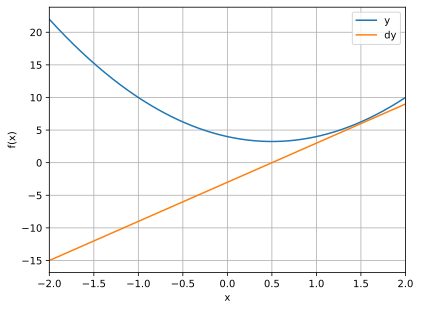

In [3]:
x=np.linspace(-2,2,2001)
plt.plot(x,fx(x),x,dfx(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [4]:
localmin=np.random.choice(x,1)
print(localmin)
learning_rate=0.01
training_epoches=100
for i in range(training_epoches):
    grad=dfx(localmin)
    localmin=localmin - grad*learning_rate

print(localmin)

[-0.47]
[0.49800677]


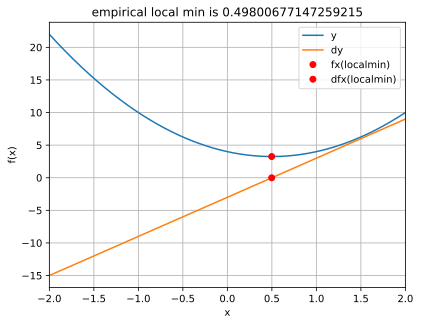

In [5]:

plt.plot(x,fx(x),x,dfx(x))
plt.plot(localmin,fx(localmin),'ro')
plt.plot(localmin,dfx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy','fx(localmin)','dfx(localmin)'])
plt.title(f'empirical local min is {localmin[0]}')
plt.show()

In [6]:
localmin=np.random.choice(x,1)[0]

learning_rate=0.001
training_epoches=1000
modelparams=np.zeros((training_epoches,2))
for i in range(training_epoches):
    grad=dfx(localmin)
    localmin=localmin - grad*learning_rate
    modelparams[i,:]=localmin,grad


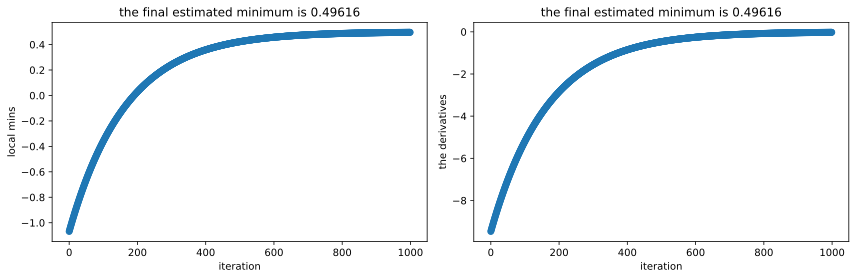

In [7]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    ax[i].plot(modelparams[:,i],'o-')
    ax[i].set_xlabel('iteration')
    ax[i].set_title(f'the final estimated minimum is {localmin:.5f}')
ax[0].set_ylabel('local mins')
ax[1].set_ylabel('the derivatives')
plt.tight_layout()
plt.show()

In [8]:
def fx(x):
    return(np.cos(2*np.pi*x) +x**2)
def dfx(x):
    return(-2*np.pi*np.sin(2*np.pi*x) + 2*x)


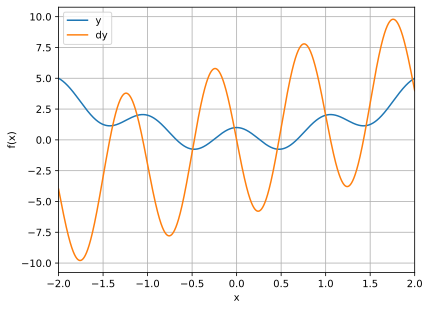

In [9]:
x=np.linspace(-2,2,2001)
plt.plot(x,fx(x),x,dfx(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [10]:
# localmin=np.random.choice(x,1)
localmin=0
print(localmin)
learning_rate=0.01
training_epoches=100
for i in range(training_epoches):
    grad=dfx(localmin)
    localmin=localmin - grad*learning_rate

print(localmin)

0
0.0


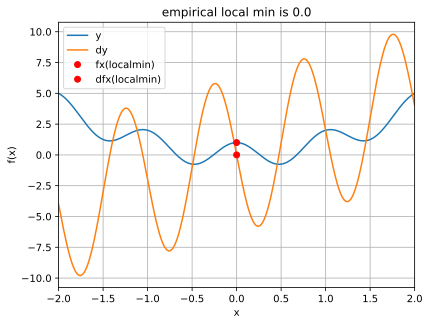

In [11]:

plt.plot(x,fx(x),x,dfx(x))
plt.plot(localmin,fx(localmin),'ro')
plt.plot(localmin,dfx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy','fx(localmin)','dfx(localmin)'])
plt.title(f'empirical local min is {localmin}')
plt.show()

In [12]:
# localmin=np.random.choice(x,1)[0]
localmin=0

learning_rate=0.001
training_epoches=1000
modelparams=np.zeros((training_epoches,2))
for i in range(training_epoches):
    grad=dfx(localmin)
    localmin=localmin - grad*learning_rate
    modelparams[i,:]=localmin,grad


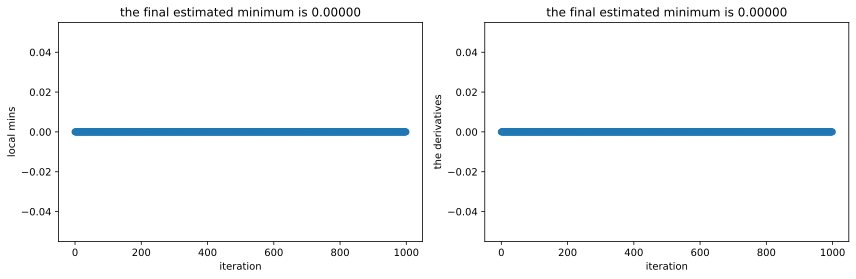

In [13]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    ax[i].plot(modelparams[:,i],'o-')
    ax[i].set_xlabel('iteration')
    ax[i].set_title(f'the final estimated minimum is {localmin:.5f}')
ax[0].set_ylabel('local mins')
ax[1].set_ylabel('the derivatives')
plt.tight_layout()
plt.show()

In [14]:
def peaks(x,y):
    x,y=np.meshgrid(x,y)
    z=3*(1-x)**2 * np.exp(-(x**2) -(y+1)**2) \
    -10*(x/5 - x**3 - y**5) *np.exp(-x**2 -y**2)\
    -1/3*np.exp(-(x+1)**2 - y**2)
    return z

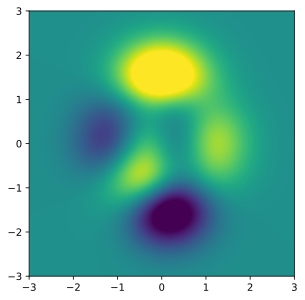

In [15]:
x=np.linspace(-3,3,201)
y=np.linspace(-3,3,201)
z=peaks(x,y)
plt.imshow(z,extent=[x[0],x[-1],y[0],y[-1]], vmin=-5,vmax=5,origin='lower')

plt.show()

In [16]:
sx,sy=sym.symbols('sx,sy')
sz=3*(1-sx)**2 * sym.exp(-(sx**2) -(sy+1)**2) \
    -10*(sx/5 - sx**3 - sy**5) *sym.exp(-sx**2 -sy**2)\
    -1/3*sym.exp(-(sx+1)**2 - sy**2)
df_x_sym=sym.diff(sz,sx)
df_y_sym=sym.diff(sz,sy)
df_x=sym.lambdify((sx,sy),df_x_sym,'sympy')
df_y=sym.lambdify((sx,sy),df_y_sym,'sympy')
df_x(1,1).evalf()

-1.07369833656079

In [17]:
localmin=np.random.choice(x,2)
startpnt=localmin[:]
learning_rate=0.01
training_epoches=1000
trajectory=np.zeros((training_epoches,2))
for i in range(training_epoches):
    grad=np.array([df_x(localmin[0],localmin[1]).evalf(),
                  df_y(localmin[0],localmin[1]).evalf()])
    localmin=localmin - grad*learning_rate
    trajectory[i,:]=localmin
print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666835]
[0.39 1.29]


In [18]:
trajectory

array([[0.43086444, 1.21391506],
       [0.46717478, 1.12883383],
       [0.49565885, 1.03985002],
       ...,
       [0.29644555, 0.32019625],
       [0.29644555, 0.32019625],
       [0.29644555, 0.32019625]])

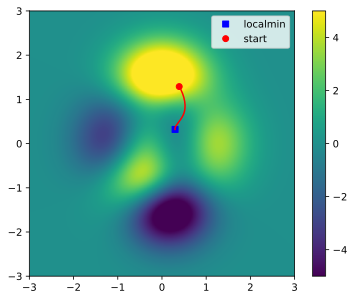

In [19]:
plt.imshow(z,extent=[x[0],x[-1],y[0],y[-1]], vmin=-5,vmax=5,origin='lower')
plt.plot(localmin[0],localmin[1],'bs')
plt.plot(startpnt[0],startpnt[1],'ro')
plt.plot(trajectory[:,0], trajectory[:,1],'r')
plt.legend(['localmin','start'])
plt.colorbar()
plt.show()

In [20]:
localmax=np.random.choice(x,2)
startpnt=localmax[:]
learning_rate=0.01
training_epoches=1000
trajectory=np.zeros((training_epoches,2))
for i in range(training_epoches):
    grad=np.array([df_x(localmax[0],localmax[1]).evalf(),
                  df_y(localmax[0],localmax[1]).evalf()])
    localmax=localmax + grad*learning_rate
    trajectory[i,:]=localmax
print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666835]
[-1.92 -1.05]


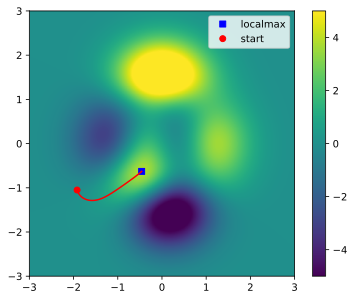

In [21]:
plt.imshow(z,extent=[x[0],x[-1],y[0],y[-1]], vmin=-5,vmax=5,origin='lower')
plt.plot(localmax[0],localmax[1],'bs')
plt.plot(startpnt[0],startpnt[1],'ro')
plt.plot(trajectory[:,0], trajectory[:,1],'r')
plt.legend(['localmax','start'])
plt.colorbar()
plt.show()

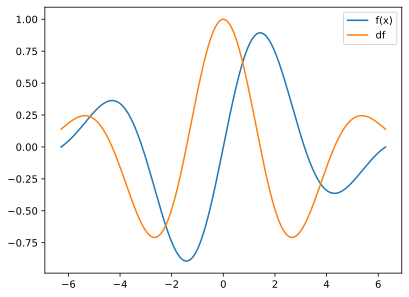

In [22]:
x=np.linspace(-2*np.pi,2*np.pi,401)
fx=np.sin(x)*np.exp(-x**2*0.05)
df=np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)
plt.plot(x,fx,x,df)
plt.legend(['f(x)','df'])

In [23]:
def fx(x):
    return(np.sin(x)*np.exp(-x**2*0.05))
def dfx(x):
    return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)


In [24]:
localmin=np.random.choice(x,1)

print(localmin)
learning_rate=0.01
training_epoches=1000
for i in range(training_epoches):
    grad=dfx(localmin)
    localmin=localmin - grad*learning_rate

print(localmin)

[-0.5969026]
[-1.42883538]


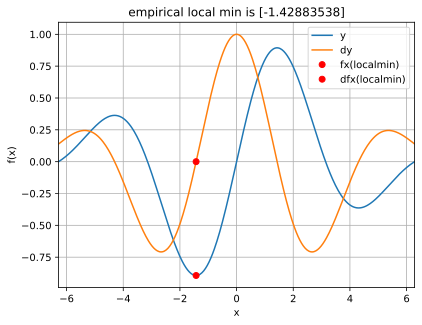

In [25]:

plt.plot(x,fx(x),x,dfx(x))
plt.plot(localmin,fx(localmin),'ro')
plt.plot(localmin,dfx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy','fx(localmin)','dfx(localmin)'])
plt.title(f'empirical local min is {localmin}')
plt.show()

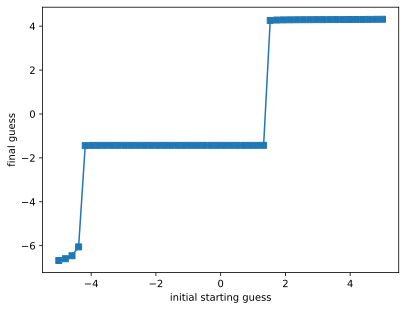

In [26]:
startlocs=np.linspace(-5,5,50)
finalres=np.zeros(len(startlocs))
for idx,localmin in enumerate(startlocs):
    for i in range(training_epoches):
        grad=dfx(localmin)
        localmin=localmin -learning_rate*grad
    finalres[idx]=localmin
plt.plot(startlocs,finalres,'s-')
plt.xlabel('initial starting guess')
plt.ylabel('final guess')
plt.show()

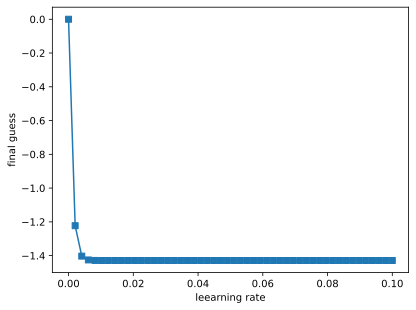

In [29]:
learning_rate=np.linspace(1e-10,1e-1,50)
finalres=np.zeros(len(learning_rate))
for idx,lr in enumerate(learning_rate):
    localmin=0
    for i in range(training_epoches):
        
        grad=dfx(localmin)
        localmin=localmin -lr*grad
    finalres[idx]=localmin
plt.plot(learning_rate,finalres,'s-')
plt.xlabel('leearning rate')
plt.ylabel('final guess')
plt.show()

In [30]:
learning_rate=np.linspace(1e-10,1e-1,50)
training_epoches=np.round(np.linspace(100,1000,50  ))
finalres=np.zeros((len(learning_rate),len(training_epoches)))
for Lidx,lr in enumerate(learning_rate):
    for Tidx,te in enumerate(training_epoches):
        localmin=0
        for i in range(int(te)):
            grad=dfx(localmin)
            localmin=localmin - lr*grad
        finalres[Lidx,Tidx]=localmin


In [32]:
finalres

array([[-1.00000000e-08, -1.18000000e-08, -1.37000000e-08, ...,
        -9.63000000e-08, -9.82000000e-08, -1.00000000e-07],
       [-2.02292399e-01, -2.37885683e-01, -2.75027637e-01, ...,
        -1.20634665e+00, -1.21497074e+00, -1.22283087e+00],
       [-3.94409498e-01, -4.59438330e-01, -5.25226364e-01, ...,
        -1.39853737e+00, -1.40081643e+00, -1.40281690e+00],
       ...,
       [-1.42880438e+00, -1.42885935e+00, -1.42886845e+00, ...,
        -1.42887001e+00, -1.42887001e+00, -1.42887001e+00],
       [-1.42881764e+00, -1.42886185e+00, -1.42886886e+00, ...,
        -1.42887001e+00, -1.42887001e+00, -1.42887001e+00],
       [-1.42882825e+00, -1.42886376e+00, -1.42886917e+00, ...,
        -1.42887001e+00, -1.42887001e+00, -1.42887001e+00]])

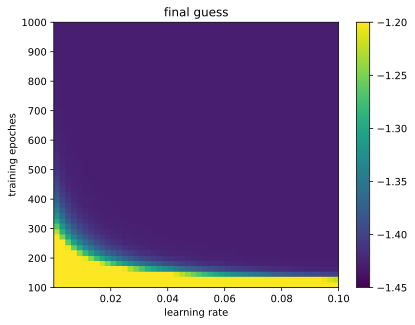

In [35]:
plt.imshow(finalres,extent=[learning_rate[0],learning_rate[-1],training_epoches[0],training_epoches[-1]],aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('learning rate')
plt.ylabel('training epoches')
plt.title('final guess')
plt.colorbar()

Text(0.5, 1.0, 'each line is a training epochs N')

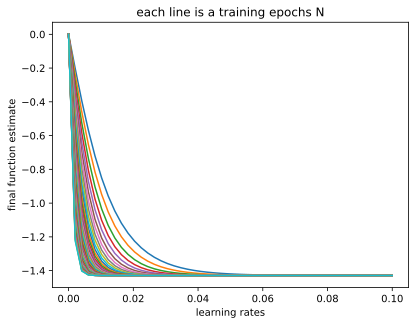

In [37]:
plt.plot(learning_rate,finalres)
plt.xlabel('learning rates')
plt.ylabel('final function estimate')
plt.title('each line is a training epochs N')

In [75]:
localmin=np.random.choice(x,1)[0]
print(localmin)
initval=localmin
learning_rate=0.01
training_epoches=50
modelparamsfixed=np.zeros((training_epoches,3))
for i in range(training_epoches):
    grad=dfx(localmin)
    localmin=localmin - grad*learning_rate
    lr=learning_rate
    modelparamsfixed[i,:]=localmin,grad,lr

-5.7805304826052195


In [76]:
localmin

-5.885807303419632

In [77]:
localmin=np.random.choice(x,1)[0]
print(localmin)

learning_rate=0.01
training_epoches=50
modelparamsgrad=np.zeros((training_epoches,3))
for i in range(training_epoches):
    grad=dfx(localmin)
    lr=learning_rate*np.abs(grad)
    localmin=localmin - grad*lr
    modelparamsgrad[i,:]=localmin,grad,lr

-0.40840704496667257


In [78]:
learning_rate=0.1
localmin=initval
modelparamsTime=np.zeros((training_epoches,3))
for i in range(training_epoches):
    grad=dfx(localmin)
    lr=learning_rate*(1-(i+1)/training_epoches)
    localmin=localmin -grad*lr
    modelparamsTime[i,:]=localmin,grad,lr


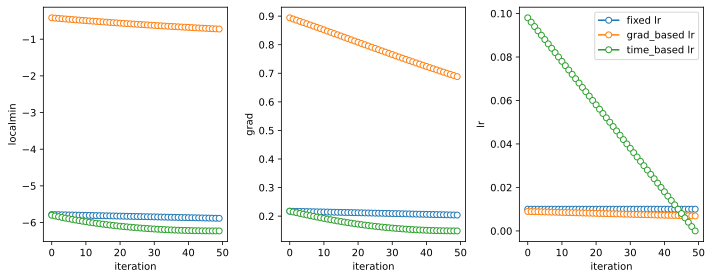

In [79]:
fig,ax=plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].plot(modelparamsfixed[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsgrad[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
    ax[i].set_xlabel('iteration')
ax[0].set_ylabel('localmin')
ax[1].set_ylabel('grad')
ax[2].set_ylabel('lr')
ax[2].legend(['fixed lr','grad_based lr','time_based lr'])
plt.tight_layout()
plt.show()